<a href="https://colab.research.google.com/github/ManasviAtGitHub/Python-practice/blob/main/Statistics_for_Data_Science_with_python__1_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Structured Data**

Numerical (expressed on numeric scale)
1.   Continous (any value in interval)
2.   Discrete (only integer values)

Categorical (specific set of values nominal/factors)
1. Binary (set of only two values)
2. Ordinal (set of mulitple values with explicit order)


  

**Rectangular Data**




*   Use of Data frames (spreadsheet) structure.
*   Feature : atrributes of data
*   Outcome : target or dependent variable
*   Records : observation or sample





**Estimates of Location**
"*First Moment of distribution*"
1. Mean (average)
2. Weighted mean (weighted average)
3. Median (50th percentile)
4. Percentile: P percent data lies below (quantile)
5. Weighted median (1 half sum lies above and below the sorted data)
6. Trimmed mean (truncated mean)
7. Robust (Not sensitive to extreme values)
8. Outlier (extreme value)


In [2]:
cd drive/MyDrive/Datasets_py/

/content/drive/MyDrive/Datasets_py


In [ ]:
!ls

airline_stats.csv  house_sales.csv    loan200.csv	sp500_sectors.csv
click_rates.csv    housetasks.csv     loan3000.csv	state.csv
dfw_airline.csv    imanishi_data.csv  loans_income.csv	web_page_data.csv
four_sessions.csv  lc_loans.csv       LungDisease.csv


In [1]:
import pandas as pd
from scipy import stats

In [3]:
state = pd.read_csv('state.csv')

In [ ]:
state.head()

,State,Population,Murder.Rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR
4,California,37253956,4.4,CA


using location metrics to define data

In [ ]:
state['Population'].mean()

6162876.3

In [ ]:
state['Population'].median()

4436369.5

In [ ]:
stats.trim_mean(state['Population'], 0.1)

4783697.125

**Estimates of Variability**
"*Second Moment of distribution*"
Deviations : difference between observed and estimate of location (errors, residual)

Variance : sum of squared deviations from mean divided by n-1 values (mean sqaured error)

Standard deviation : square root of variance

Mean absolute deviation : the mean of absolute values of the deviations from the mean (l1 norm, manhattan norm)

Range : the difference between the largest and the smallest value in a data set.

Order statistics : Metrics based on the data values from smallest to biggest. (ranks)

Percentile : the value such that P % of the values take on this value or less and (100 - P) % take on this value or more.

Interquartile range : the difference between the 75th percentile and the 25th percentile. (IQR)


In [ ]:
state['Population'].std()

6848235.347401142

In [ ]:
state['Population'].quantile(0.75) - state['Population'].quantile(0.25) 

4847308.0

In [4]:
%%capture
import statsmodels.api as sm

In [ ]:
#median absolute deviation (MAD)
sm.robust.scale.mad(state['Population'])

3849876.1459979336

**Exploring Data Distribution**

Boxplot (box and whiskers plot)

Frequency table (numeric data values that fall into set of intervals (bins))

Histogram (a plot of frequency table with the bins on the x and count on the y axis)

Density plot (smoothed version of the histogram)


In [ ]:
state['Murder.Rate'].quantile([0.05,0.25,0.5,0.75,0.95])

0.05    1.600
0.25    2.425
0.50    4.000
0.75    5.550
0.95    6.510
Name: Murder.Rate, dtype: float64

In [ ]:
df = pd.DataFrame(state['Murder.Rate'].quantile([0.05,0.25,0.5,0.75,0.95]))
df

,Murder.Rate
0.05,1.600
0.25,2.425
0.50,4.000
0.75,5.550
0.95,6.510


In [ ]:
df.index = [f'{p*100} %' for p in [0.05,0.25,0.5,0.75,0.95]]
df

,Murder.Rate
5.0 %,1.600
25.0 %,2.425
50.0 %,4.000
75.0 %,5.550
95.0 %,6.510


In [ ]:
df.transpose()

,5.0 %,25.0 %,50.0 %,75.0 %,95.0 %
Murder.Rate,1.6,2.425,4.0,5.55,6.51


In [5]:
import matplotlib.pylab as plt
%matplotlib inline

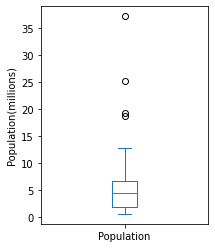

In [ ]:
ax = (state['Population']/1e6).plot.box(figsize=(3,4))
ax.set_ylabel('Population(millions)')
plt.show()

In [6]:
binPopulation = pd.cut(state['Population'],10)
binPopulation.value_counts()

(526935.67, 4232659.0]      24
(4232659.0, 7901692.0]      14
(7901692.0, 11570725.0]      6
(11570725.0, 15239758.0]     2
(15239758.0, 18908791.0]     1
(18908791.0, 22577824.0]     1
(22577824.0, 26246857.0]     1
(33584923.0, 37253956.0]     1
(26246857.0, 29915890.0]     0
(29915890.0, 33584923.0]     0
Name: Population, dtype: int64

In [ ]:
binPopulation.name = 'binPopulation'
df = pd.concat([state,binPopulation], axis =1)


In [8]:
df.head()

,State,Population,Murder.Rate,Abbreviation,binPopulation
0,Alabama,4779736,5.7,AL,"(4232659.0, 7901692.0]"
1,Alaska,710231,5.6,AK,"(526935.67, 4232659.0]"
2,Arizona,6392017,4.7,AZ,"(4232659.0, 7901692.0]"
3,Arkansas,2915918,5.6,AR,"(526935.67, 4232659.0]"
4,California,37253956,4.4,CA,"(33584923.0, 37253956.0]"


In [9]:
df = df.sort_values(by='Population')

In [10]:
df.head()

,State,Population,Murder.Rate,Abbreviation,binPopulation
49,Wyoming,563626,2.7,WY,"(526935.67, 4232659.0]"
44,Vermont,625741,1.6,VT,"(526935.67, 4232659.0]"
33,North Dakota,672591,3.0,ND,"(526935.67, 4232659.0]"
1,Alaska,710231,5.6,AK,"(526935.67, 4232659.0]"
40,South Dakota,814180,2.3,SD,"(526935.67, 4232659.0]"


In [11]:
df.groupby(by='binPopulation').head()

,State,Population,Murder.Rate,Abbreviation,binPopulation
49,Wyoming,563626,2.7,WY,"(526935.67, 4232659.0]"
44,Vermont,625741,1.6,VT,"(526935.67, 4232659.0]"
33,North Dakota,672591,3.0,ND,"(526935.67, 4232659.0]"
1,Alaska,710231,5.6,AK,"(526935.67, 4232659.0]"
40,South Dakota,814180,2.3,SD,"(526935.67, 4232659.0]"
16,Kentucky,4339367,3.6,KY,"(4232659.0, 7901692.0]"
17,Louisiana,4533372,10.3,LA,"(4232659.0, 7901692.0]"
39,South Carolina,4625364,6.4,SC,"(4232659.0, 7901692.0]"
0,Alabama,4779736,5.7,AL,"(4232659.0, 7901692.0]"
5,Colorado,5029196,2.8,CO,"(4232659.0, 7901692.0]"


In [12]:
groups = []
for group, subset in df.groupby(by='binPopulation'):
  groups.append({
      'BinRange': group,
      'Count': len(subset),
      'States': ','.join(subset.Abbreviation)
  })

In [17]:
pd.DataFrame(groups)

,BinRange,Count,States
0,"(526935.67, 4232659.0]",24,"WY,VT,ND,AK,SD,DE,MT,RI,NH,ME,HI,ID,NE,WV,NM,N..."
1,"(4232659.0, 7901692.0]",14,"KY,LA,SC,AL,CO,MN,WI,MD,MO,TN,AZ,IN,MA,WA"
2,"(7901692.0, 11570725.0]",6,"VA,NJ,NC,GA,MI,OH"
3,"(11570725.0, 15239758.0]",2,"PA,IL"
4,"(15239758.0, 18908791.0]",1,FL
5,"(18908791.0, 22577824.0]",1,NY
6,"(22577824.0, 26246857.0]",1,TX
7,"(26246857.0, 29915890.0]",0,
8,"(29915890.0, 33584923.0]",0,
9,"(33584923.0, 37253956.0]",1,CA


Histograms

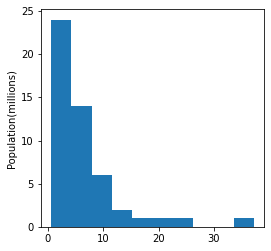

In [16]:
ax = (state['Population']/1e6).plot.hist(figsize=(4,4))
ax.set_ylabel('Population(millions)')
plt.show()

Density Estimates : provides insight of distribution.

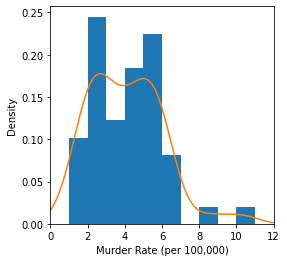

In [20]:
ax = state['Murder.Rate'].plot.hist(density = True,xlim=[0,12],bins=range(1,12), figsize=(4,4))
state['Murder.Rate'].plot.density(ax=ax)
ax.set_xlabel('Murder Rate (per 100,000)')
plt.show()

Exploring Binary and Categorical Data

Mode (most common value)

Expected value (gives an average value based on category's probability of occurrence)

Bar charts (frequency for each category plotted as bars)

Pie charts (frequency or proportion for each category plotted as wedges in a pie)

In [26]:
df = pd.read_csv('dfw_airline.csv')
df

,Carrier,ATC,Weather,Security,Inbound
0,64263.16,84856.5,11235.42,343.15,118427.82


In [32]:
print(f'{100 * df/df.values.sum()} in  %')

     Carrier        ATC   Weather  Security    Inbound
0  23.022989  30.400781  4.025214  0.122937  42.428079 in  %


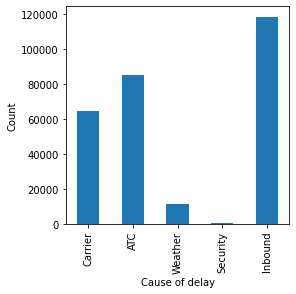

In [31]:
ax = df.transpose().plot.bar(figsize=(4,4), legend = False)
ax.set_xlabel('Cause of delay')
ax.set_ylabel('Count')
plt.show()

In [77]:
sp_sector = pd.read_csv('sp500_sectors.csv')
sp_data = pd.read_csv('sp500_data.csv')

In [78]:
sp_sector.head(7)

,sector,sector_label,sub_sector,symbol
0,information_technology,Technology,data_processing_&_outsourced_services,ADS
1,information_technology,Technology,systems_software,CA
2,information_technology,Technology,systems_software,MSFT
3,information_technology,Technology,systems_software,RHT
4,information_technology,Technology,it_consulting_&_services,CTSH
5,information_technology,Technology,it_consulting_&_services,CSC
6,information_technology,Technology,it_consulting_&_services,EMC


In [79]:
sp_data.head()

,Unnamed: 0,ADS,CA,MSFT,RHT,CTSH,CSC,EMC,IBM,XRX,...,WAT,ALXN,AMGN,BXLT,BIIB,CELG,GILD,REGN,VRTX,HSIC
0,1993-01-29,0.0,0.060124,-0.022100,0.0,0.0,0.018897,0.007368,0.092165,0.259140,...,0.0,0.0,0.34716,0.0,0.04167,0.00000,0.015564,1.75,0.1250,0.0
1,1993-02-01,0.0,-0.180389,0.027621,0.0,0.0,0.018889,0.018425,0.115207,-0.100775,...,0.0,0.0,-0.23144,0.0,0.00000,-0.01041,0.007782,1.25,0.1250,0.0
2,1993-02-02,0.0,-0.120257,0.035900,0.0,0.0,-0.075573,0.029482,-0.023041,0.028796,...,0.0,0.0,-0.11572,0.0,0.00000,0.00000,-0.007792,-0.25,0.0000,0.0
3,1993-02-03,0.0,0.060124,-0.024857,0.0,0.0,-0.151128,0.003689,-0.253454,-0.043190,...,0.0,0.0,-0.08679,0.0,0.04167,-0.04167,-0.038919,-0.50,0.0625,0.0
4,1993-02-04,0.0,-0.360770,-0.060757,0.0,0.0,0.113350,-0.022114,0.069862,0.000000,...,0.0,0.0,0.14465,0.0,-0.04166,-0.03126,-0.046711,0.00,0.0625,0.0


In [81]:
sp_data.columns.tolist()

['Unnamed: 0',
 'ADS',
 'CA',
 'MSFT',
 'RHT',
 'CTSH',
 'CSC',
 'EMC',
 'IBM',
 'XRX',
 'ALTR',
 'ADI',
 'AVGO',
 'BRCM',
 'FSLR',
 'INTC',
 'LLTC',
 'MCHP',
 'MU',
 'NVDA',
 'QRVO',
 'QCOM',
 'SWKS',
 'TXN',
 'XLNX',
 'AAPL',
 'HPQ',
 'EA',
 'SNDK',
 'STX',
 'WDC',
 'TEL',
 'HRS',
 'MSI',
 'ACN',
 'AMAT',
 'KLAC',
 'LRCX',
 'ADBE',
 'ADSK',
 'ORCL',
 'SYMC',
 'TDC',
 'AKAM',
 'ADP',
 'CTXS',
 'EBAY',
 'EQIX',
 'FB',
 'FIS',
 'FISV',
 'GOOGL',
 'GOOG',
 'INTU',
 'MA',
 'NTAP',
 'NFLX',
 'PAYX',
 'CRM',
 'TSS',
 'VRSN',
 'V',
 'WU',
 'YHOO',
 'CSCO',
 'FFIV',
 'JNPR',
 'PBI',
 'RHI',
 'GLW',
 'ADT',
 'FLR',
 'NLSN',
 'DNB',
 'IRM',
 'BA',
 'FLIR',
 'GD',
 'LMT',
 'NOC',
 'RTN',
 'CSX',
 'KSU',
 'NSC',
 'UNP',
 'AAL',
 'DAL',
 'LUV',
 'AME',
 'APH',
 'JBHT',
 'GWW',
 'CTAS',
 'CMI',
 'DHR',
 'DOV',
 'FLS',
 'ITW',
 'JOY',
 'WM',
 'MMM',
 'ETN',
 'EMR',
 'GE',
 'HON',
 'IR',
 'JEC',
 'LLL',
 'LEG',
 'PLL',
 'PH',
 'PNR',
 'PCP',
 'PWR',
 'RSG',
 'ROK',
 'COL',
 'ROP',
 'R',
 'SRCL',
 'TX

In [88]:
sp_data['Unnamed: 0'].head()

0    1993-01-29
1    1993-02-01
2    1993-02-02
3    1993-02-03
4    1993-02-04
Name: Unnamed: 0, dtype: object

In [89]:
sp_data.rename(columns={"Unnamed: 0": "date"}, inplace=True)

In [90]:
sp_data.dtypes

date     object
ADS     float64
CA      float64
MSFT    float64
RHT     float64
         ...   
CELG    float64
GILD    float64
REGN    float64
VRTX    float64
HSIC    float64
Length: 518, dtype: object

In [86]:
sp_data.columns.tolist()

['date',
 'ADS',
 'CA',
 'MSFT',
 'RHT',
 'CTSH',
 'CSC',
 'EMC',
 'IBM',
 'XRX',
 'ALTR',
 'ADI',
 'AVGO',
 'BRCM',
 'FSLR',
 'INTC',
 'LLTC',
 'MCHP',
 'MU',
 'NVDA',
 'QRVO',
 'QCOM',
 'SWKS',
 'TXN',
 'XLNX',
 'AAPL',
 'HPQ',
 'EA',
 'SNDK',
 'STX',
 'WDC',
 'TEL',
 'HRS',
 'MSI',
 'ACN',
 'AMAT',
 'KLAC',
 'LRCX',
 'ADBE',
 'ADSK',
 'ORCL',
 'SYMC',
 'TDC',
 'AKAM',
 'ADP',
 'CTXS',
 'EBAY',
 'EQIX',
 'FB',
 'FIS',
 'FISV',
 'GOOGL',
 'GOOG',
 'INTU',
 'MA',
 'NTAP',
 'NFLX',
 'PAYX',
 'CRM',
 'TSS',
 'VRSN',
 'V',
 'WU',
 'YHOO',
 'CSCO',
 'FFIV',
 'JNPR',
 'PBI',
 'RHI',
 'GLW',
 'ADT',
 'FLR',
 'NLSN',
 'DNB',
 'IRM',
 'BA',
 'FLIR',
 'GD',
 'LMT',
 'NOC',
 'RTN',
 'CSX',
 'KSU',
 'NSC',
 'UNP',
 'AAL',
 'DAL',
 'LUV',
 'AME',
 'APH',
 'JBHT',
 'GWW',
 'CTAS',
 'CMI',
 'DHR',
 'DOV',
 'FLS',
 'ITW',
 'JOY',
 'WM',
 'MMM',
 'ETN',
 'EMR',
 'GE',
 'HON',
 'IR',
 'JEC',
 'LLL',
 'LEG',
 'PLL',
 'PH',
 'PNR',
 'PCP',
 'PWR',
 'RSG',
 'ROK',
 'COL',
 'ROP',
 'R',
 'SRCL',
 'TXT',
 '

In [91]:
sp_data['date'].head()

0    1993-01-29
1    1993-02-01
2    1993-02-02
3    1993-02-03
4    1993-02-04
Name: date, dtype: object

In [84]:
telecomSymbols = sp_sector[sp_sector['sector']== 'telecommunications_services']['symbol']

telecomSymbols.head()

332       T
333     CTL
334     FTR
335      VZ
336    LVLT
Name: symbol, dtype: object

**Correlation**

Correlation coefficient : (ranges from -1 to +1)

Correlation matrix

Scatterplot

In [68]:
sp_data.head()

,date,ADS,CA,MSFT,RHT,CTSH,CSC,EMC,IBM,XRX,...,WAT,ALXN,AMGN,BXLT,BIIB,CELG,GILD,REGN,VRTX,HSIC
Index,,,,,,,,,,,,,,,,,,,,,
0,1993-01-29,0.0,0.060124,-0.022100,0.0,0.0,0.018897,0.007368,0.092165,0.259140,...,0.0,0.0,0.34716,0.0,0.04167,0.00000,0.015564,1.75,0.1250,0.0
1,1993-02-01,0.0,-0.180389,0.027621,0.0,0.0,0.018889,0.018425,0.115207,-0.100775,...,0.0,0.0,-0.23144,0.0,0.00000,-0.01041,0.007782,1.25,0.1250,0.0
2,1993-02-02,0.0,-0.120257,0.035900,0.0,0.0,-0.075573,0.029482,-0.023041,0.028796,...,0.0,0.0,-0.11572,0.0,0.00000,0.00000,-0.007792,-0.25,0.0000,0.0
3,1993-02-03,0.0,0.060124,-0.024857,0.0,0.0,-0.151128,0.003689,-0.253454,-0.043190,...,0.0,0.0,-0.08679,0.0,0.04167,-0.04167,-0.038919,-0.50,0.0625,0.0
4,1993-02-04,0.0,-0.360770,-0.060757,0.0,0.0,0.113350,-0.022114,0.069862,0.000000,...,0.0,0.0,0.14465,0.0,-0.04166,-0.03126,-0.046711,0.00,0.0625,0.0


In [92]:
telecom = sp_data.loc[sp_data.date >='2012-07-01', telecomSymbols]
telecom.head()

,T,CTL,FTR,VZ,LVLT
4893,0.422496,0.140847,0.070879,0.554180,-0.519998
4894,-0.177448,0.066280,0.070879,-0.025976,-0.049999
4895,-0.160548,-0.132563,0.055128,-0.051956,-0.180000
4896,0.342205,0.132563,0.007875,0.140106,-0.359999
4897,0.136883,0.124279,-0.023626,0.253943,0.180000


In [93]:
telecom.corr()

,T,CTL,FTR,VZ,LVLT
T,1.000000,0.474683,0.327767,0.677612,0.278626
CTL,0.474683,1.000000,0.419757,0.416604,0.286665
FTR,0.327767,0.419757,1.000000,0.287386,0.260068
VZ,0.677612,0.416604,0.287386,1.000000,0.242199
LVLT,0.278626,0.286665,0.260068,0.242199,1.000000


In [94]:
etfs = sp_data.loc[sp_data.date>'2012-07-01', sp_sector[sp_sector['sector']=='etf']['symbol']]

In [95]:
etfs.head()

,XLI,QQQ,SPY,DIA,GLD,VXX,USO,IWM,XLE,XLY,XLU,XLB,XTL,XLV,XLP,XLF,XLK
4893,-0.376098,0.096313,0.028223,-0.242796,0.419998,-10.40,0.000000,0.534641,0.028186,0.095759,0.098311,-0.093713,0.019076,-0.009529,0.313499,0.018999,0.075668
4894,0.376099,0.481576,0.874936,0.728405,0.490006,-3.52,0.250000,0.926067,0.995942,0.000000,-0.044686,0.337373,0.000000,0.000000,0.129087,0.104492,0.236462
4895,0.150440,0.096313,-0.103487,0.149420,0.239991,6.56,-0.070000,-0.171848,-0.460387,0.306431,-0.151938,0.103086,0.019072,-0.142955,-0.073766,-0.142490,0.066211
4896,-0.141040,-0.491201,0.018819,-0.205449,-0.519989,-8.80,-0.180000,-0.229128,0.206706,0.153214,0.080437,0.018744,-0.429213,-0.095304,0.119865,0.066495,-0.227003
4897,0.244465,-0.048160,-0.056445,-0.168094,0.429992,-0.48,0.459999,-0.190939,-0.234892,-0.201098,-0.035751,-0.168687,0.000000,0.352630,-0.064548,0.018999,0.009457


**Correlation matrix**

In [96]:
import seaborn as sns

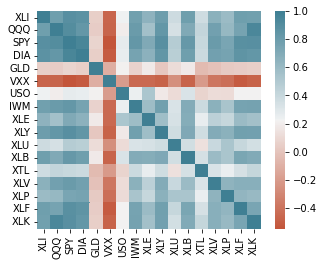

In [97]:
fig, ax = plt.subplots(figsize=(5,4))
ax = sns.heatmap(etfs.corr(),cmap = sns.diverging_palette(20,220, as_cmap=True),ax=ax)
plt.show()

**Scatterplot**

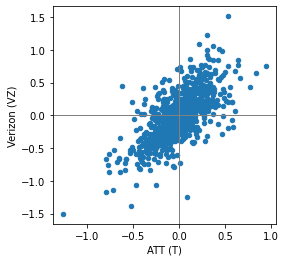

In [99]:
ax = telecom.plot.scatter(x='T', y='VZ', figsize=(4,4))
ax.set_xlabel('ATT (T)')
ax.set_ylabel('Verizon (VZ)')
ax.axhline(0, color='grey', lw=1)
ax.axvline(0, color='grey', lw=1)
plt.show()

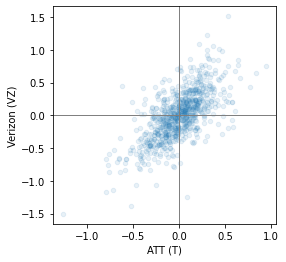

In [101]:
ax = telecom.plot.scatter(x='T', y='VZ', figsize=(4,4), alpha=0.1)
ax.set_xlabel('ATT (T)')
ax.set_ylabel('Verizon (VZ)')
ax.axhline(0, color='grey', lw=1)
ax.axvline(0, color='grey', lw=1)
plt.show()

**Exploring Two or More Variables**

Contingency Table : a tally of counts between two or more categorical variables

Hexagonal binning : a plot of two numeric variables with the records binned into hexagons

Contour plot : a plot showing the density of two numeric variables like a topographical map.

Violin plot : shows density estimate


**Plotting numeric vs numeric data**

Hexagonal binning

In [102]:
tax = pd.read_csv('kc_tax.csv')
tax.head()

,TaxAssessedValue,SqFtTotLiving,ZipCode
0,NaN,1730,98117.0
1,206000.0,1870,98002.0
2,303000.0,1530,98166.0
3,361000.0,2000,98108.0
4,459000.0,3150,98108.0


In [103]:
tax = tax.loc[(tax.TaxAssessedValue<750000) & (tax.SqFtTotLiving>100) & (tax.SqFtTotLiving<3500),:]

In [104]:
tax.head()

,TaxAssessedValue,SqFtTotLiving,ZipCode
1,206000.0,1870,98002.0
2,303000.0,1530,98166.0
3,361000.0,2000,98108.0
4,459000.0,3150,98108.0
5,223000.0,1570,98032.0


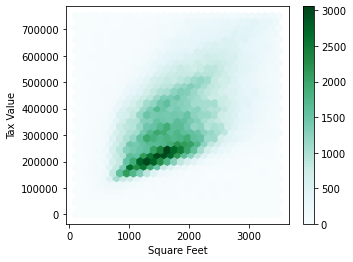

In [107]:
ax = tax.plot.hexbin(x='SqFtTotLiving', y='TaxAssessedValue', sharex=False,gridsize=30, figsize=(5,4))
ax.set_xlabel('Square Feet')
ax.set_ylabel('Tax Value')
plt.show()

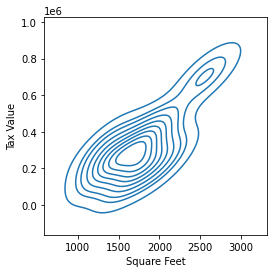

In [110]:
fig, ax = plt.subplots(figsize=(4,4))
sns.kdeplot(data = tax.sample(10),x='SqFtTotLiving', y='TaxAssessedValue', ax=ax)
ax.set_xlabel('Square Feet')
ax.set_ylabel('Tax Value')
plt.show()

**Plotting category vs category**

In [111]:
loans = pd.read_csv('lc_loans.csv')

In [112]:
crosstab = loans.pivot_table(index='grade', columns='status',aggfunc=lambda x: len(x), margins =True)


In [113]:
crosstab

status,Charged Off,Current,Fully Paid,Late,All
grade,,,,,
A,1562,50051,20408,469,72490
B,5302,93852,31160,2056,132370
C,6023,88928,23147,2777,120875
D,5007,53281,13681,2308,74277
E,2842,24639,5949,1374,34804
F,1526,8444,2328,606,12904
G,409,1990,643,199,3241
All,22671,321185,97316,9789,450961


In [114]:
df = crosstab.copy().loc['A':'G',:]
df.loc[:, 'Charged Off' : 'Late'] = df.loc[:, 'Charged Off':'Late'].div(df['All'], axis=0)

df['All'] = df['All']/sum(df['All'])
prec_crosstab = df

In [115]:
prec_crosstab

status,Charged Off,Current,Fully Paid,Late,All
grade,,,,,
A,0.021548,0.690454,0.281528,0.006470,0.160746
B,0.040054,0.709013,0.235401,0.015532,0.293529
C,0.049828,0.735702,0.191495,0.022974,0.268039
D,0.067410,0.717328,0.184189,0.031073,0.164708
E,0.081657,0.707936,0.170929,0.039478,0.077177
F,0.118258,0.654371,0.180409,0.046962,0.028614
G,0.126196,0.614008,0.198396,0.061401,0.007187


**Plotting Categorical vs Numerical**

In [117]:
df = pd.read_csv('airline_stats.csv')
df.head()

,pct_carrier_delay,pct_atc_delay,pct_weather_delay,airline
0,8.153226,1.971774,0.762097,American
1,5.959924,3.706107,1.585878,American
2,7.157270,2.706231,2.026706,American
3,12.100000,11.033333,0.000000,American
4,7.333333,3.365591,1.774194,American


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


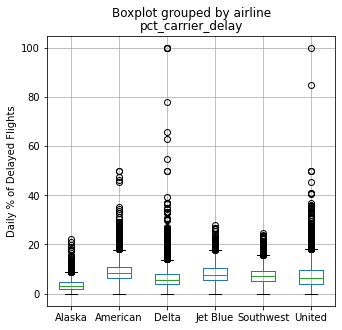

In [118]:
ax = df.boxplot(by='airline', column = 'pct_carrier_delay', figsize = (5,5))

ax.set_xlabel('')
ax.set_ylabel('Daily % of Delayed Flights')
plt.show()

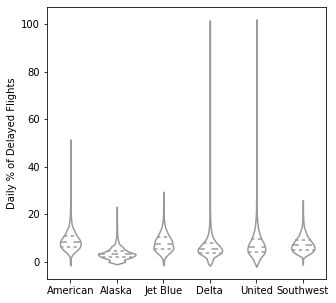

In [127]:
ax = plt.subplots(figsize = (5,5))
ax = sns.violinplot(data=df, x = 'airline', y='pct_carrier_delay', inner='quartile', color='white')
ax.set_xlabel('')
ax.set_ylabel('Daily % of Delayed Flights')
plt.show()